In [71]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import pickle as pkl

In [2]:
# read file

data = pd.read_csv('customer_churn.csv', sep=';')
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39.0,14,5.0,18,Standard,Annual,932.0,17,1
1,3,65,Female,49.0,1,10.0,8,Basic,Monthly,557.0,6,1
2,4,55,Female,14.0,4,6.0,18,Basic,Quarterly,185.0,3,1
3,5,58,Male,38.0,21,7.0,7,Standard,Monthly,396.0,29,1
4,6,23,Male,32.0,20,5.0,8,Basic,Monthly,617.0,20,1


## Dataset Explanation


CustomerID: unique identifier of each customers

Age: customer's age

Gender: customer's gender (Male/Female).

Tenure: how long the customers been subscribing (in months)

Usage Frequency: The number of frequency using the service from each customer (each month)

Support Calls: the number of calls made by customers.

Payment Delay: Number of payment delay (in days)

Subscription Type: Types of subscription choosen by the customers ("Basic", "Premium", "Standard").

Contract Length: Duration contract each customer ("Monthly", "Quarterly", "Annual").

Total Spend: Total expenses from each customer

Last Interaction: Last interaction with the service (in days).

Churn: Churn status (1 if churn, 0 if not churned).

In [3]:
data.shape   # there are 440832 rows with 12 columns

(440832, 12)

In [4]:
data.info()  # as we can see the datatypes from each column are already appropriate
# we can also see that there are some missing values found on some columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  int64  
 1   Age                440832 non-null  int64  
 2   Gender             440821 non-null  object 
 3   Tenure             440820 non-null  float64
 4   Usage Frequency    440832 non-null  int64  
 5   Support Calls      440802 non-null  float64
 6   Payment Delay      440832 non-null  int64  
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440823 non-null  float64
 10  Last Interaction   440832 non-null  int64  
 11  Churn              440832 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 40.4+ MB


In [5]:
data.describe()  # showing statistical summary from the dataset, it only shows the numerical column only

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440820.000000,440832.000000,440802.000000,440832.000000,440823.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256207,15.807494,3.604348,12.965722,631.617599,14.480868,0.567107
std,129531.918550,12.442369,17.255696,8.586242,3.070219,8.258063,240.802052,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
data.columns   # here are the list of column names on the dataset

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [7]:
data["Churn"].value_counts()  # as we can see the distribution between the churned and not churned customers are quite equal, so the bias shouldn't be that much

,count
Churn,
1,249999
0,190833


## Check Duplication

In [29]:
data.duplicated().sum()  # ga ada duplikasi detected

np.int64(0)

## Splitting Data into Train and Test

In [10]:
input_df=data.drop(['Churn','CustomerID'], axis=1)  # input data merupakan kolom sisanya selain label (churn) dan drop cust id karna ga perlu
output_df=data['Churn']  # churn as predicted label

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [15]:
x_train  # training data untuk x, yakni sebanyak 352665 rows dengan 10 kolom

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
321744,24,Male,58.0,28,0.0,4,Basic,Annual,665.22,29
175119,24,Male,26.0,12,1.0,26,Basic,Quarterly,754.00,12
272447,18,Male,36.0,8,0.0,7,Premium,Quarterly,852.86,9
66769,36,Female,18.0,9,2.0,23,Premium,Monthly,758.00,3
70297,57,Female,27.0,26,8.0,15,Basic,Monthly,688.00,10
...,...,...,...,...,...,...,...,...,...,...
259178,41,Male,44.0,18,2.0,13,Premium,Annual,717.39,3
365838,45,Female,44.0,14,3.0,13,Basic,Annual,995.38,8
131932,37,Female,9.0,4,10.0,12,Basic,Monthly,979.00,8
146867,33,Male,27.0,5,10.0,20,Premium,Annual,824.00,1


In [16]:
y_train  # training data untuk label sebanyak 352665 rows dengan 1 kolom saja

,Churn
321744,0
175119,1
272447,0
66769,1
70297,1
...,...
259178,0
365838,0
131932,1
146867,1


In [17]:
x_train.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

In [22]:
x_test  # testing data x

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
159565,23,Female,10.0,16,8.0,16,Premium,Quarterly,589.00,13
127464,33,Male,3.0,20,0.0,22,Basic,Quarterly,158.00,12
22398,27,Female,57.0,3,0.0,24,Standard,Annual,915.00,26
99337,35,Female,28.0,23,5.0,13,Basic,Annual,334.00,29
300996,28,Male,53.0,30,2.0,5,Basic,Annual,568.86,15
...,...,...,...,...,...,...,...,...,...,...
285006,39,Male,57.0,28,1.0,20,Basic,Quarterly,951.98,5
39267,31,Female,60.0,9,9.0,15,Standard,Quarterly,589.00,25
397189,23,Male,36.0,17,2.0,3,Premium,Quarterly,621.06,14
136393,62,Female,54.0,22,8.0,17,Premium,Annual,896.00,9


In [23]:
y_test  # testing data y

,Churn
159565,1
127464,1
22398,1
99337,1
300996,0
...,...
285006,0
39267,1
397189,0
136393,1


## Handle Missing Value

In [30]:
# cek missing value
print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

# dapat dilihat bahwa kedua kolom y (label), baik test maupun train tidak ditemukan adanya missing values,
# namun pada kedua kolom x train dan tes terdapat beberapa missing values

# disini saya punya 2 opsi antar drop semua missing values atau lakukan imputation, karena jumlah missing values yang masih tergolong sangat minim,
# maka untuk melakukan imputasi masih cukup aman, karena datanya menjadi tidak terlalu bias.

Age                   0
Gender                9
Tenure               11
Usage Frequency       0
Support Calls        22
Payment Delay         0
Subscription Type     0
Contract Length       0
Total Spend           6
Last Interaction      0
dtype: int64
Age                  0
Gender               2
Tenure               1
Usage Frequency      0
Support Calls        8
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          3
Last Interaction     0
dtype: int64
0
0


Disini, saya mencari tau dulu persebaran datanya, untuk menghitung nilai untuk fill missing value tadi

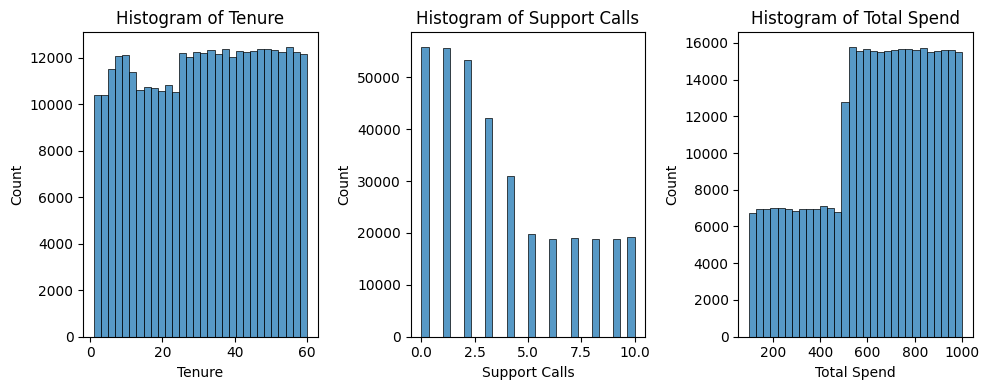

In [50]:
plt.figure(figsize=(10, 4))

# Histogram untuk "Tenure"
# 1 baris , 3 kolom maks, kolom ke 1
plt.subplot(1, 3, 1)
sns.histplot(x_train["Tenure"], bins=30)
plt.title("Histogram of Tenure")

# Histogram untuk "Support Calls"
plt.subplot(1, 3, 2)
sns.histplot(x_train["Support Calls"], bins=30)
plt.title("Histogram of Support Calls")

# Histogram untuk "Total Spend"
plt.subplot(1, 3, 3)
sns.histplot(x_train["Total Spend"], bins=30)
plt.title("Histogram of Total Spend")

plt.tight_layout()
plt.show()


In [49]:
# cek normality distribution
miss_val_cols = ["Tenure", "Support Calls", "Total Spend"]  # Ganti dengan daftar kolom numerik yang ingin diuji

for col in miss_val_cols:
    stat, p = shapiro(data[col])
    print(f"Shapiro-Wilk Test for {col}: Statistic={stat:.4f}, p-value={p:.4f}")

    if p < 0.05:
        print(f"Data {col} tidak terdistribusi normal.\n")
    else:
        print(f"Data {col} berdistribusi normal.\n")


Shapiro-Wilk Test for Tenure: Statistic=nan, p-value=nan
Data Tenure berdistribusi normal.

Shapiro-Wilk Test for Support Calls: Statistic=nan, p-value=nan
Data Support Calls berdistribusi normal.

Shapiro-Wilk Test for Total Spend: Statistic=nan, p-value=nan
Data Total Spend berdistribusi normal.



karena semua kolomnya sudah berdistribusi normal, maka dapat dilakukan imputation dengan mean saja

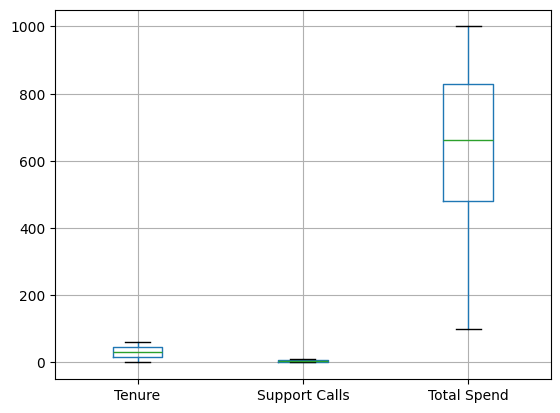

In [52]:
# Check Outliers
boxplot = x_train.boxplot(column=['Tenure','Support Calls','Total Spend'])
plt.show()

In [53]:
# menghitung mean dari setiap kolom
print('Mean Tenure:',np.mean(x_train['Tenure']))
print('Mean Support Calls:',np.mean(x_train['Support Calls']))
print('Mean Total Spend:',np.mean(x_train['Total Spend']))

Mean Tenure: 31.264970764545417
Mean Support Calls: 3.6030886760831775
Mean Total Spend: 631.5849042275968


In [54]:
# lakukan imputasi missing value untuk kedua xtrain dan xtest menggunakan mean diatas, ini keknya dia 2 angka belakang koma
x_train['Tenure'].fillna(31.3, inplace=True)
x_train['Support Calls'].fillna(4, inplace=True)
x_train['Total Spend'].fillna(631.6, inplace=True)


x_test['Tenure'].fillna(31.3, inplace=True)
x_test['Support Calls'].fillna(4, inplace=True)
x_test['Total Spend'].fillna(631.6, inplace=True)


<ipython-input-54-511e74932f4c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Tenure'].fillna(31.3, inplace=True)
<ipython-input-54-511e74932f4c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [59]:
# karena gender merupakan categorical, maka isi dengan mode
print(x_train['Gender'].mode())  # maka imputasi akan diinput menggunakan "male"

0    Male
Name: Gender, dtype: object


In [60]:
# impute missing value dengan mode
x_train['Gender'].fillna('Male', inplace=True)
x_test['Gender'].fillna('Male', inplace=True)


<ipython-input-60-bd58a10f64e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Gender'].fillna('Male', inplace=True)
<ipython-input-60-bd58a10f64e7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [61]:
# cek missing value setelah di isi semua

print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

# dapat dilihat sudah tidak ada lagi missing value detected

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
dtype: int64
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
dtype: int64
0
0


In [62]:
x_train.info()  # dapat dilihat bahwa sudah tidak ada lagi missing value yang terdeteksi

<class 'pandas.core.frame.DataFrame'>
Index: 352665 entries, 321744 to 121958
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                352665 non-null  int64  
 1   Gender             352665 non-null  object 
 2   Tenure             352665 non-null  float64
 3   Usage Frequency    352665 non-null  int64  
 4   Support Calls      352665 non-null  float64
 5   Payment Delay      352665 non-null  int64  
 6   Subscription Type  352665 non-null  object 
 7   Contract Length    352665 non-null  object 
 8   Total Spend        352665 non-null  float64
 9   Last Interaction   352665 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 29.6+ MB


## Encoding

karena ml model hanya dapat menerima data dalam bentuk numerik, maka kita perlu melakukan encode untuk tipe data selain numerik.

In [63]:
data["Gender"].value_counts()

,count
Gender,
Male,250245
Female,190576


In [65]:
data['Subscription Type'].value_counts()

,count
Subscription Type,
Standard,149128
Premium,148678
Basic,143026


In [66]:
data['Contract Length'].value_counts()

,count
Contract Length,
Annual,177198
Quarterly,176530
Monthly,87104


In [67]:
# Binary Encoding Categorical to integer
xtrain_encode={"Gender": {"Male":1,"Female":0}}
x_train=x_train.replace(xtrain_encode)
x_test=x_test.replace(xtrain_encode)

<ipython-input-67-4aa2fcf5e61d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train=x_train.replace(xtrain_encode)
<ipython-input-67-4aa2fcf5e61d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test=x_test.replace(xtrain_encode)


In [68]:
x_train.head()  # gendernya suda berhasil di encode

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
321744,24,1,58.0,28,0.0,4,Basic,Annual,665.22,29
175119,24,1,26.0,12,1.0,26,Basic,Quarterly,754.00,12
272447,18,1,36.0,8,0.0,7,Premium,Quarterly,852.86,9
66769,36,0,18.0,9,2.0,23,Premium,Monthly,758.00,3
70297,57,0,27.0,26,8.0,15,Basic,Monthly,688.00,10


In [69]:
xtrain_encode

{'Gender': {'Male': 1, 'Female': 0}}

In [72]:
filename = 'gender_encode.pkl'
pkl.dump(xtrain_encode, open(filename, 'wb'))

In [73]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder

subs_enc_train=x_train[['Subscription Type']]
cont_enc_train=x_train[['Contract Length']]

subs_enc_test=x_test[['Subscription Type']]
cont_enc_test=x_test[['Contract Length']]

train_encoded_subs=OneHotEncoder()
train_encoded_cont=OneHotEncoder()

subs_enc_train=pd.DataFrame(train_encoded_subs.fit_transform(subs_enc_train).toarray(),columns=train_encoded_subs.get_feature_names_out())
cont_enc_train=pd.DataFrame(train_encoded_cont.fit_transform(cont_enc_train).toarray(),columns=train_encoded_cont.get_feature_names_out())

subs_enc_test=pd.DataFrame(train_encoded_subs.transform(subs_enc_test).toarray(),columns=train_encoded_subs.get_feature_names_out())
cont_enc_test=pd.DataFrame(train_encoded_cont.transform(cont_enc_test).toarray(),columns=train_encoded_cont.get_feature_names_out())


x_train=x_train.reset_index()
x_test=x_test.reset_index()

x_train_enc=pd.concat([x_train,subs_enc_train,cont_enc_train], axis=1)
x_test_enc=pd.concat([x_test,subs_enc_test,cont_enc_test], axis=1)

In [74]:
train_encoded_cont.get_feature_names_out()

array(['Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'], dtype=object)

In [75]:
train_encoded_subs.get_feature_names_out()

array(['Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard'], dtype=object)

In [76]:
filename_subs = 'oneHot_encode_subs.pkl'
pkl.dump(train_encoded_subs, open(filename_subs, 'wb'))

filename_subs = 'oneHot_encode_cont.pkl'
pkl.dump(train_encoded_cont, open(filename_subs, 'wb'))

In [77]:
x_train_enc.head()

,index,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,321744,24,1,58.0,28,0.0,4,Basic,Annual,665.22,29,1.0,0.0,0.0,1.0,0.0,0.0
1,175119,24,1,26.0,12,1.0,26,Basic,Quarterly,754.00,12,1.0,0.0,0.0,0.0,0.0,1.0
2,272447,18,1,36.0,8,0.0,7,Premium,Quarterly,852.86,9,0.0,1.0,0.0,0.0,0.0,1.0
3,66769,36,0,18.0,9,2.0,23,Premium,Monthly,758.00,3,0.0,1.0,0.0,0.0,1.0,0.0
4,70297,57,0,27.0,26,8.0,15,Basic,Monthly,688.00,10,1.0,0.0,0.0,0.0,1.0,0.0


In [78]:
x_test_enc.head()

,index,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,159565,23,0,10.0,16,8.0,16,Premium,Quarterly,589.00,13,0.0,1.0,0.0,0.0,0.0,1.0
1,127464,33,1,3.0,20,0.0,22,Basic,Quarterly,158.00,12,1.0,0.0,0.0,0.0,0.0,1.0
2,22398,27,0,57.0,3,0.0,24,Standard,Annual,915.00,26,0.0,0.0,1.0,1.0,0.0,0.0
3,99337,35,0,28.0,23,5.0,13,Basic,Annual,334.00,29,1.0,0.0,0.0,1.0,0.0,0.0
4,300996,28,1,53.0,30,2.0,5,Basic,Annual,568.86,15,1.0,0.0,0.0,1.0,0.0,0.0


In [79]:
x_train_enc.columns

Index(['index', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

## Define the features for modelling

In [81]:
# drop kolom yang ga dibutuhkan lagi
x_train_enc=x_train_enc.drop(['index','Subscription Type', 'Contract Length'],axis=1)

In [82]:
x_train_enc.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,24,1,58.0,28,0.0,4,665.22,29,1.0,0.0,0.0,1.0,0.0,0.0
1,24,1,26.0,12,1.0,26,754.00,12,1.0,0.0,0.0,0.0,0.0,1.0
2,18,1,36.0,8,0.0,7,852.86,9,0.0,1.0,0.0,0.0,0.0,1.0
3,36,0,18.0,9,2.0,23,758.00,3,0.0,1.0,0.0,0.0,1.0,0.0
4,57,0,27.0,26,8.0,15,688.00,10,1.0,0.0,0.0,0.0,1.0,0.0


In [83]:
x_train_enc.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction',
       'Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Contract Length_Annual',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')

In [84]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train_enc, y_train)


RandomForestClassifier(max_depth=4)

In [85]:
x_test_enc=x_test_enc.drop(['index','Subscription Type', 'Contract Length'],axis=1)  # drop kolom yang uda ga perlu

In [86]:
y_predict=RF_class.predict(x_test_enc)

In [89]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.95      0.99      0.97     38063
           0       1.00      0.96      0.98     50104

    accuracy                           0.98     88167
   macro avg       0.97      0.98      0.97     88167
weighted avg       0.98      0.98      0.98     88167



In [90]:
filename = 'RF_churn.pkl'
pkl.dump(RF_class, open(filename, 'wb'))

## Checking some features value for deployment

In [91]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440820.000000,440832.000000,440802.000000,440832.000000,440823.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256207,15.807494,3.604348,12.965722,631.617599,14.480868,0.567107
std,129531.918550,12.442369,17.255696,8.586242,3.070219,8.258063,240.802052,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [92]:
conda list scikit


ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

ModuleNotFoundError: No module named 'streamlit'